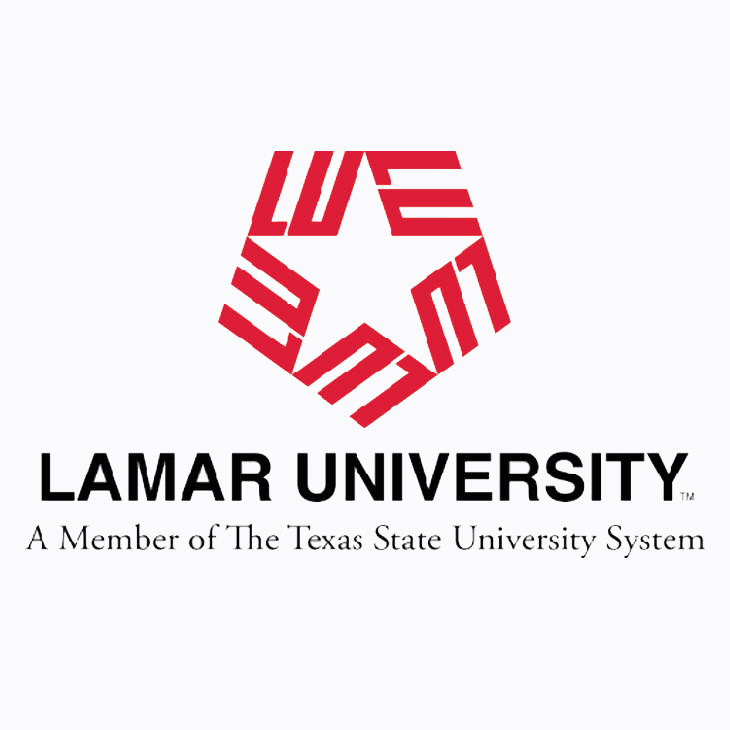

<table border="1" align="center">
    <tr style="background-color:#ADD8E6 ;">
        <td>
            <h1><font color='red'><center>Prediction of ozone in houston</center></font></h1>
        </td>
    </tr>
    <tr style="background-color:#ADD8E6 ;">
        <td>
        <h3><font color='blue'> <center> Vandan B Gadhiya </center> </font></h3>
        <h3><font color='blue'> <center> Azeez Asiwaju </center> </font></h3>
        <h3><font color='blue'> <center> Azucena Lopez </center> </font></h3>
        <h3><font color='blue'> <center> MD Mahbubur Rahman </center> </font></h3>
        </td>
    </tr>    
    </table>

<h2><font color="red"> Load Libraries </font> </h2>

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

<h2><font color="red"> Change working directory and Load the excel file as dataframe</font> </h2> 

In [3]:
os.chdir('C:/Users/keyur/Downloads') # set working directory
fname = 'O3_Var.xlsx' 
O3_var_a = pd.read_excel(fname) #load the data file as pandas dataframe
O3_var_a.head(5)

,Date,Clinton C403/C304/AH113,Houston Westhollow C410/C3003,West Houston C554,La Porte Sylvan Beach C556,Mercer Arboretum C557,Meyer Park C561,Houston Aldine C8/AF108/X1502,UH Moody Tower C695,temp,humidity,wind speed,precipatation,radiation
0,2022-01-01,NaN,22.0,28.0,21.0,28.0,26.0,30.0,27.0,76.0,57.0,12.4,0.00,0.002
1,2022-01-02,NaN,23.0,34.0,32.0,30.0,30.0,30.0,30.0,50.0,55.9,20.3,0.01,0.458
2,2022-01-03,30.0,26.0,36.0,30.0,35.0,35.0,NaN,29.0,43.0,44.0,5.0,0.00,0.228
3,2022-01-04,NaN,32.0,43.0,30.0,38.0,39.0,39.0,42.0,51.0,59.8,6.9,0.00,0.087
4,2022-01-05,28.0,31.0,42.0,30.0,38.0,40.0,36.0,37.0,62.0,76.2,5.5,0.00,0.300


<h2><font color="red"> Set date as index </font> </h2> 

In [4]:
O3_var = O3_var_a.set_index('Date') #set date as index for dataframe
O3_var.head(5)

,Clinton C403/C304/AH113,Houston Westhollow C410/C3003,West Houston C554,La Porte Sylvan Beach C556,Mercer Arboretum C557,Meyer Park C561,Houston Aldine C8/AF108/X1502,UH Moody Tower C695,temp,humidity,wind speed,precipatation,radiation
Date,,,,,,,,,,,,,
2022-01-01,NaN,22.0,28.0,21.0,28.0,26.0,30.0,27.0,76.0,57.0,12.4,0.00,0.002
2022-01-02,NaN,23.0,34.0,32.0,30.0,30.0,30.0,30.0,50.0,55.9,20.3,0.01,0.458
2022-01-03,30.0,26.0,36.0,30.0,35.0,35.0,NaN,29.0,43.0,44.0,5.0,0.00,0.228
2022-01-04,NaN,32.0,43.0,30.0,38.0,39.0,39.0,42.0,51.0,59.8,6.9,0.00,0.087
2022-01-05,28.0,31.0,42.0,30.0,38.0,40.0,36.0,37.0,62.0,76.2,5.5,0.00,0.300


<h2><font color="red"> Replace the No values with mean of column in dataframe </font> </h2> 

In [5]:
O3_var.columns = O3_var.columns.to_series().apply(lambda x: x.strip()) #remove whitespaces from column names 
c = ['Clinton C403/C304/AH113','Houston Westhollow C410/C3003','West Houston C554','La Porte Sylvan Beach C556','Mercer Arboretum C557','Meyer Park C561','Houston Aldine C8/AF108/X1502','UH Moody Tower C695','temp','humidity','wind speed','radiation']
O3_var[c] = O3_var[c].fillna(O3_var[c].mean()) #fill the no values with the mean of that perticular column 
O3_var.head(5)

,Clinton C403/C304/AH113,Houston Westhollow C410/C3003,West Houston C554,La Porte Sylvan Beach C556,Mercer Arboretum C557,Meyer Park C561,Houston Aldine C8/AF108/X1502,UH Moody Tower C695,temp,humidity,wind speed,precipatation,radiation
Date,,,,,,,,,,,,,
2022-01-01,37.126344,22.0,28.0,21.0,28.0,26.0,30.000000,27.0,76.0,57.0,12.4,0.00,0.002
2022-01-02,37.126344,23.0,34.0,32.0,30.0,30.0,30.000000,30.0,50.0,55.9,20.3,0.01,0.458
2022-01-03,30.000000,26.0,36.0,30.0,35.0,35.0,35.133333,29.0,43.0,44.0,5.0,0.00,0.228
2022-01-04,37.126344,32.0,43.0,30.0,38.0,39.0,39.000000,42.0,51.0,59.8,6.9,0.00,0.087
2022-01-05,28.000000,31.0,42.0,30.0,38.0,40.0,36.000000,37.0,62.0,76.2,5.5,0.00,0.300


<h2><font color="red"> Select relevant data for one site and Get summary </font> </h2> 

In [6]:
O3_s1 = O3_var[['Clinton C403/C304/AH113','temp','humidity','wind speed','precipatation','radiation']] #select data columns for relevant site 
O3_s1.rename(columns = {'Clinton C403/C304/AH113':'ozone'}, inplace = True) #replace the site name by ozone
O3_s1.describe() #get summary of ozone data 

,ozone,temp,humidity,wind speed,precipatation,radiation
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,37.126344,69.345324,67.654415,9.215274,0.117613,0.276451
std,13.122268,14.960896,13.531606,3.974844,0.419777,0.129748
min,6.000000,24.000000,23.000000,0.000000,0.000000,0.001000
25%,29.000000,58.000000,60.050000,6.200000,0.000000,0.180500
50%,37.000000,72.000000,69.000000,8.300000,0.000000,0.276451
75%,43.500000,83.000000,76.700000,11.900000,0.010000,0.380500
max,87.000000,94.000000,97.400000,26.000000,4.050000,0.609000


<h2><font color="red"> Plot correlation matrix </font> </h2> 

In [7]:
corr_s1= O3_s1.corr() #get correlation matrix 
corr_s1

,ozone,temp,humidity,wind speed,precipatation,radiation
ozone,1.000000,0.290430,-0.426292,-0.330739,-0.112324,0.481278
temp,0.290430,1.000000,0.155782,-0.156617,-0.031757,0.469185
humidity,-0.426292,0.155782,1.000000,0.190850,0.255851,-0.435051
wind speed,-0.330739,-0.156617,0.190850,1.000000,0.139356,-0.116299
precipatation,-0.112324,-0.031757,0.255851,0.139356,1.000000,-0.229734
radiation,0.481278,0.469185,-0.435051,-0.116299,-0.229734,1.000000


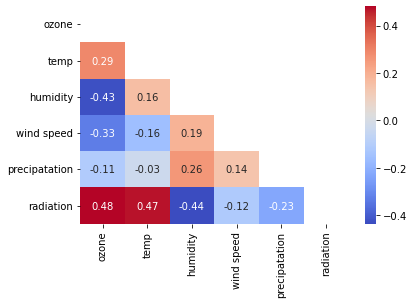

In [8]:
mask = np.triu(np.ones_like(corr_s1)) #mask the upper side table 
sns.heatmap(corr_s1, mask=mask, cmap='coolwarm', annot=True, fmt='.2f') #plot heatmap of the correlation matrix
plt.show()

<h1><font color="red"> Regression model 1 </font> </h1> 

<h3><font color="red"> Develop model 1 for temprature and radiation </font> </h3> 

In [9]:
X = O3_s1[['temp','radiation']].values #define independent(x) variables
y = O3_s1['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [11]:
model = sm.OLS(y_train, X_train).fit() #fit the model with tarining data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     49.22
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.91e-19
Time:                        00:46:14   Log-Likelihood:                -1285.9
No. Observations:                 335   AIC:                             2578.
Df Residuals:                     332   BIC:                             2589.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3112      2.878      6.710      0.000      13.650      24.973
x1             0.0871      0.047      1.867      0.063      -0.005       0.179
x2            41.8838      5.500      7.615      0.000      31.064      52.703
==============================================================================
Omnibus:                       24.081   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.589
Skew:                           0.552   Prob(JB):                     1.38e-07
Kurtosis:                       4.022   Cond. No.                         629.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [13]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred  

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [14]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 150.5242422415646


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

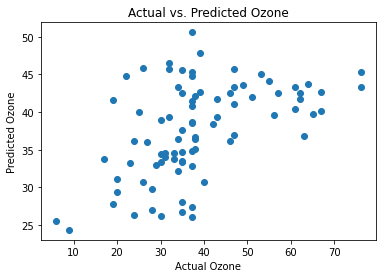

In [15]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [16]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.09791405517840213, 0.06294983080695643)

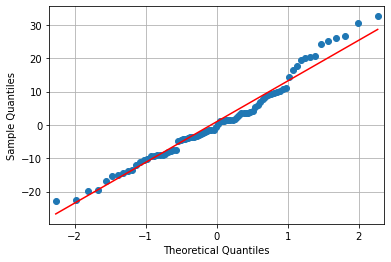

In [17]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [18]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(18.415046776028838,
 0.04835315947818936,
 1.8730028074601137,
 0.04813020394660209)

<h1><font color="red"> Regression model 2 </font> </h1> 

<h3><font color="red"> Develop model 2 for radiation and precipitation </font> </h3> 

In [19]:
X = O3_s1[['precipatation','radiation']].values #define independent(x) variables
y = O3_s1['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [21]:
model = sm.OLS(y_train, X_train).fit() #fit the model with tarining data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     47.03
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.04e-18
Time:                        00:46:18   Log-Likelihood:                -1287.6
No. Observations:                 335   AIC:                             2581.
Df Residuals:                     332   BIC:                             2593.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8127      1.541     15.451      0.000      20.781      26.844
x1             0.3940      1.398      0.282      0.778      -2.356       3.144
x2            47.1966      4.975      9.487      0.000      37.411      56.982
==============================================================================
Omnibus:                       30.884   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.028
Skew:                           0.646   Prob(JB):                     4.54e-10
Kurtosis:                       4.188   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [23]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred 

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [24]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 149.87360192857204


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

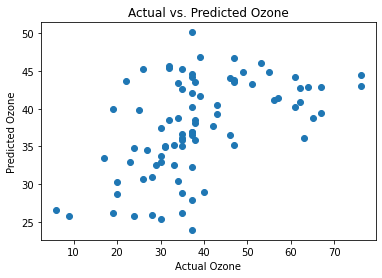

In [25]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [26]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.10403740841662779, 0.03767349788948118)

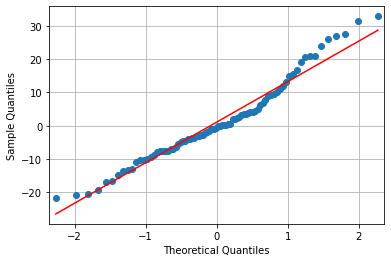

In [27]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [28]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(18.604599450418867,
 0.045581974215281144,
 1.8934159638948622,
 0.04529049175627973)

<h1><font color="red"> Regression model 3 </font> </h1> 

<h3><font color="red"> Develop model 3 for wind speed and humidity </font> </h3> 

In [50]:
X = O3_s1[['wind speed','humidity']].values #define independent(x) variables
y = O3_s1['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [52]:
model = sm.OLS(y_train, X_train).fit() #fit the model with training data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     48.02
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.81e-19
Time:                        00:59:03   Log-Likelihood:                -1286.9
No. Observations:                 335   AIC:                             2580.
Df Residuals:                     332   BIC:                             2591.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.3182      3.323     20.256      0.000      60.781      73.856
x1            -0.7932      0.156     -5.073      0.000      -1.101      -0.486
x2            -0.3415      0.048     -7.184      0.000      -0.435      -0.248
==============================================================================
Omnibus:                       25.693   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.580
Skew:                           0.583   Prob(JB):                     5.11e-08
Kurtosis:                       4.022   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [54]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred 

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [34]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 140.22514845478221


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

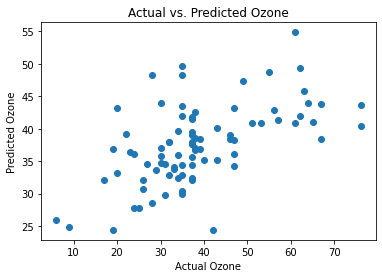

In [35]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [55]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.09545081400140842, 0.07646125102461947)

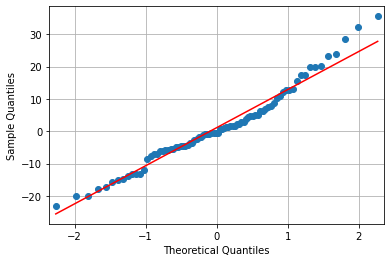

In [37]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [38]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(12.279213511090843,
 0.2668043396647455,
 1.2251788282956275,
 0.2736515263711417)

<h1><font color="red"> Regression model 4 </font> </h1> 

<h3><font color="red"> Develop model 4 for temprature, radiation, precipatation, wind speed and humidity </font> </h3> 

In [39]:
X = O3_s1[['temp','radiation','precipatation','wind speed','humidity']].values #define independent(x) variables
y = O3_s1['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [41]:
model = sm.OLS(y_train, X_train).fit() #fit the model with tarining data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     36.23
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.59e-29
Time:                        00:46:40   Log-Likelihood:                -1255.9
No. Observations:                 335   AIC:                             2524.
Df Residuals:                     329   BIC:                             2547.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1592      4.240     10.651      0.000      36.819      53.500
x1             0.1996      0.050      3.976      0.000       0.101       0.298
x2            19.2318      6.458      2.978      0.003       6.528      31.936
x3             1.8675      1.303      1.433      0.153      -0.695       4.430
x4            -0.6220      0.148     -4.214      0.000      -0.912      -0.332
x5            -0.3220      0.057     -5.694      0.000      -0.433      -0.211
==============================================================================
Omnibus:                       13.397   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.476
Skew:                           0.391   Prob(JB):                     0.000436
Kurtosis:                       3.705   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [43]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred 

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [44]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 115.05024079542703


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

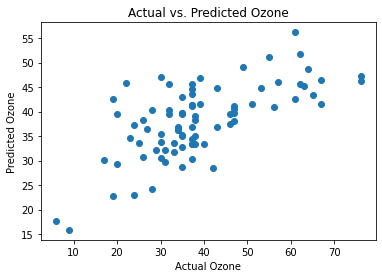

In [45]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [46]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.06962782061612632, 0.46058156209365125)

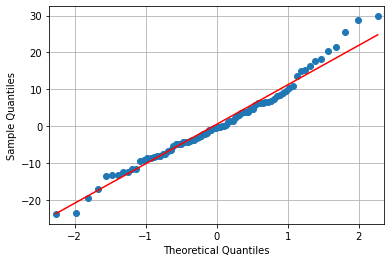

In [47]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [48]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(16.505740152842183,
 0.08604148454699184,
 1.6531949779199966,
 0.09087216239158416)